In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
import os
#print(os.listdir("./tmdb-5000-movie-dataset"))

In [2]:
df_c=pd.read_csv('/Users/chaoma/Desktop/tmdb-5000-movie-dataset/tmdb_5000_credits.csv')
df_m=pd.read_csv('/Users/chaoma/Desktop/tmdb-5000-movie-dataset/tmdb_5000_movies.csv')


# 对TMDB电影进行探索性数据分析

一.[提出问题](#提出问题)<br>
二.[清洗数据](#清洗数据)<br>
三.[分析数据](#分析数据)<br>
四.[总结](#总结)<br>

前言：
通过对从TMDB上爬取的电影信息进行探索，试图分析电影行业产量质量发展趋势，从电影投资人角度分析如何提高影片的票房，利润和口碑，找到流行趋势。
报告分为：
一.提出问题
二.清洗数据
三.分析数据
四.总结

一.提出问题<a id="提出问题"></a>
1.从电影诞生至今，产生了哪些类型的电影？随时间变化，各类型电影的发展趋势是什么？哪类电影更受观众欢迎？能给制片方带来更多利润？
2.电影票房与哪些因素相关？如何预测一部电影是否受观众欢迎？
3.统计哪些导演和演员参与制作的电影质量上乘的可能性大。

二.清洗数据<a id="清洗数据"></a>

1. 查看两个表格所包含的变量和数据特征。

In [3]:
df_c.head().T

,0,1,2,3,4
movie_id,19995,285,206647,49026,49529
title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
cast,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."
crew,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
df_m.head().T

,0,1,2,3,4
budget,237000000,300000000,245000000,250000000,260000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/,http://movies.disney.com/john-carter
id,19995,285,206647,49026,49529
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.438,139.083,107.377,112.313,43.927
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"


2.提取两个表中的jason格式数据，将之转换为Python下的数据结构。
  将cast列中排行前三的演员名字提取出来，存入辅助列'actor_1','actor_2'和'actor_3'中。
  将crew列中的导演信息提取出来，将导演名字存入辅助列'director'中。

In [5]:
#数据的json格式是[{},{}]
json_cols=['cast','crew']
#应用json.loads,
#编码：把一个Python对象编码转换成Json字符串   json.dumps()
#解码：把Json格式字符串解码转换成Python对象   json.loads()
for i in json_cols:
    df_c[i]=df_c[i].apply(json.loads)
#用json方法汇总所有类型
def get_names(x):
    return ','.join([i['name'] for i in x])
#i['name']提取name后的名字 以逗号分隔
#join()：连接字符串数组。将字符串、元组、列表中的元素以指定的字符(分隔符)连接生成一个新的字符串
#'sep'.join(seq)

In [6]:
df_c['cast'] = df_c['cast'].apply(get_names)

In [7]:
def director(x):
    for i in x:
        if i['job'] == 'Director': #判断director
            return i['name']
df_c['crew'] = df_c['crew'].apply(director) 

In [8]:
def actor(x, n):
    try:
        return x.split(',',10)[n-1]
    except IndexError or KeyError:
        return pd.np.nan

df_c['actor_1'] = df_c['cast'].apply(lambda x: actor(x,1))
df_c['actor_2'] = df_c['cast'].apply(lambda x: actor(x,2))
df_c['actor_3'] = df_c['cast'].apply(lambda x: actor(x,3))

In [9]:
df_c= df_c.rename(columns={'crew': 'director'}) #更改列名

In [10]:
#json解析
json_cols=['genres','keywords','spoken_languages','production_countries','production_companies']
for i in json_cols:
    df_m[i]=df_m[i].apply(json.loads)
    
df_m['genres'] = df_m['genres'].apply(get_names)
df_m['keywords'] = df_m['keywords'].apply(get_names)
df_m['spoken_languages'] = df_m['spoken_languages'].apply(get_names)
df_m['production_countries'] = df_m['production_countries'].apply(get_names)
df_m['production_companies'] = df_m['production_companies'].apply(get_names)

3.删掉本次报告用不到的列：'homepage','original_title','spoken_languages','original_language','title','cast'。更改列名，使之更直观。将tmdb_5000_credits和tmdb_5000_movies合并为一张新的表格。

In [11]:
df_clean_m = df_m.drop(['homepage','original_title','spoken_languages','original_language','title','tagline','overview'],axis = 1)

In [12]:
df_clean_c = df_c.drop(['cast'],axis = 1)

In [13]:
df_clean_m= df_clean_m.rename(columns={'production_companies': 'productor','production_countries':'countries','runtime':'duration','vote_average':'score'}) #更改列名

In [14]:
df = pd.merge(df_clean_c, df_clean_m, left_on = 'movie_id', right_on = 'id', how = 'inner')

In [15]:
df = df.drop(['id'], axis = 1)

4.经观察发现，有1037部电影的'budget'为0，1427部电影的'revenue'为0，1部电影的'release_date'为空值（revenue & budget = 0），2部电影的‘duration’为空值（revenue ＝0),62部电影'vote_count'为0。
 对这些异常数据进行删除操作。除此之外，一些电影的‘budget’和‘revenue’过小，不符合常识，因此选择最小的2%作删除处理。
 为分析电影利润创建'profit'列。

In [16]:
df.dropna(subset =['duration','release_date'],inplace = True)
df = df[df['vote_count']!=0]
df = df[df['revenue']!=0]
df = df[df['budget']!=0]

In [17]:
Percentile_budget = np.nanpercentile(df['budget'],2)
Percentile_budget

382591.64000000001

In [18]:
Percentile_revenue = np.nanpercentile(df['revenue'],2)
Percentile_revenue

148417.0

In [19]:
df = df[df['revenue']>148417.0]
df = df[df['budget']>382591.64000000001]

In [20]:
df['profit'] = df['revenue'] - df['budget']

In [21]:
df[df['profit'].isnull()]

,movie_id,title,director,actor_1,actor_2,actor_3,budget,genres,keywords,popularity,productor,countries,release_date,revenue,duration,status,score,vote_count,profit


5.对列'countries'和'genres'进行one-hot处理：添加辅助列，如果电影属于该国家或者该类型，则标记被1，不属于则标记为0。将release_date中上映年份的信息提取出来，存储在'release_year'中。

In [22]:
country = set()
for i in df['countries'].str.split(',').values:
    country = country.union(set(i))

In [23]:
country.remove('')
country = list(country)

In [24]:
for c in country:
    df[c] = df['countries'].str.contains(c).apply(lambda x:1 if x else 0)

In [25]:
genre = set()
for i in df['genres'].str.split(',').values:
    genre = genre.union(set(i))

In [26]:
genre.remove('')
genre = list(genre)

In [27]:
len(genre)

19

In [28]:
for g in genre:
    df[g] = df['genres'].str.contains(g).apply(lambda x:1 if x else 0)

In [29]:
#将release_date中上映年份的信息提取出来
df['release_year']=pd.to_datetime(df.release_date,format='%Y-%m-%d').dt.year

In [30]:
df_gy = df.loc[:,genre]
df_gy.index = df['release_year']
df_gy1=df_gy.sort_index(ascending=False)#根据索引年份排序
df_gys = df_gy1.groupby('release_year').sum()#计算每个类型每年的数量

In [31]:
df_gysum = df_gys.sum().sort_values(ascending=True)
df_gysum

Foreign               2
Documentary          29
Western              55
Music               106
War                 115
History             141
Animation           185
Mystery             256
Horror              311
Fantasy             336
Family              360
Science Fiction     417
Crime               507
Romance             554
Adventure           656
Action              901
Thriller            910
Comedy             1069
Drama              1376
dtype: int64

In [32]:
df_cy = df.loc[:,country]
df_cy.index = df['release_year']
df_cy1 = df_cy.sort_index(ascending=False)
df_cys = df_cy1.groupby('release_year').sum()

In [33]:
df_cys.tail()

,Luxembourg,Argentina,Romania,Italy,Switzerland,Dominica,China,Netherlands,Portugal,Sweden,...,Jamaica,Belgium,South Korea,Serbia,Chile,Hong Kong,Lithuania,Fiji,Malta,Finland
release_year,,,,,,,,,,,,,,,,,,,,,
2012,1,0,0,1,0,0,1,0,0,2,...,0,1,0,1,0,2,0,0,0,0
2013,0,1,0,2,1,0,3,0,0,1,...,0,1,1,0,0,1,0,0,1,0
2014,0,0,0,0,1,0,3,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2015,0,0,1,0,1,0,5,0,0,0,...,0,1,0,0,1,4,0,0,0,0
2016,0,0,0,0,0,0,7,0,0,0,...,0,0,0,0,0,2,0,0,1,1


In [34]:
#(df['budget'].sort_values().index)[0:10] budget最小的10部电影

三.分析数据<a id="分析数据"></a>

1. 总体发展趋势
科学技术和商业模式在一个世纪发生了翻天覆地的变化，所以首先从电影行业的整体发展情况来分析一下近些年来电影的趋势。

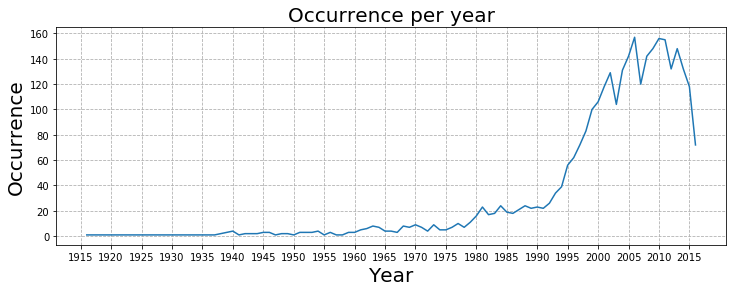

In [35]:
df.groupby('release_year')['movie_id'].count().plot(figsize=(12, 4))
plt.xticks(range(1915,2018,5))
plt.title('Occurrence per year',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Occurrence',fontsize=20)
plt.grid(ls='--')
plt.show()

从图中可以看到，在1960年之前每年电影产量只有零星几部；从上世纪60年代开始到20世纪90年代，处于平缓发展的阶段；从1990年开始，世界电影发展迅猛，2010年左右达到巅峰。

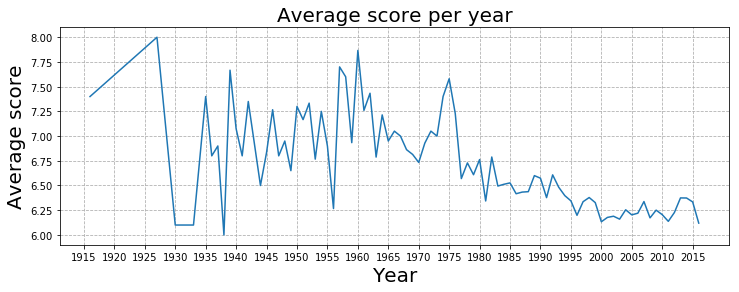

In [36]:
df.groupby('release_year')['score'].mean().plot(figsize = (12,4))
plt.title('Average score per year', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Average score', fontsize = 20)
plt.xticks(range(1915,2018,5))
plt.grid(ls='--')
plt.show()

In [37]:
#df[df['release_year']<1965][['score','release_year']].sort_values('release_year')

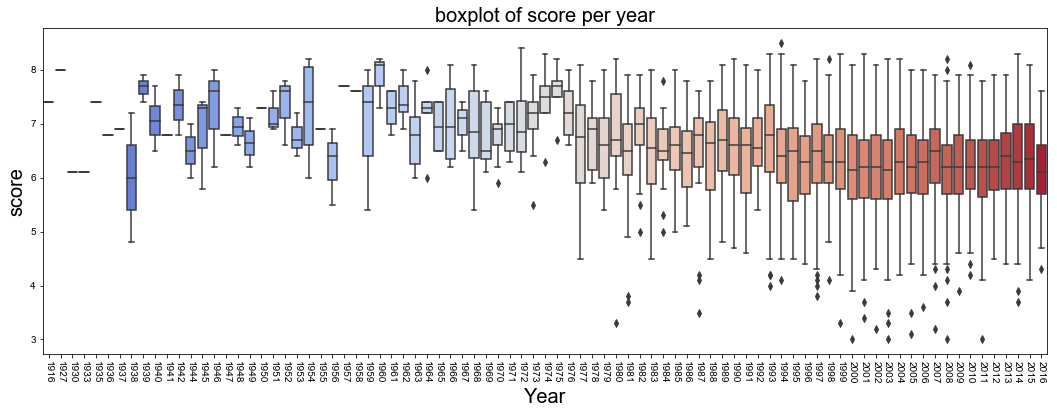

In [38]:
import matplotlib.ticker as ticker

score_year = df.groupby('release_year')['score'].mean().sort_values(ascending = False)
score_data = pd.DataFrame({'year': score_year.index, 'score': score_year.values})
f,ax = plt.subplots(figsize = (18,6))
#pal = sns.dark_palette("green", as_cmap=True)
sns.boxplot(data = df, x = 'release_year', y = 'score',palette="coolwarm")
#sns.lineplot(data = score_data, x = 'year', y ='score')#为什么这个折线图显示不出来呢
sns.set_style("darkgrid")
plt.title('boxplot of score per year', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('score', fontsize = 20)
plt.xticks(rotation = 270)
plt.show()

观察每年电影的均分来，1915年至1960年间均分波动较大－因为每年出产的电影数量较少，所以分数受极值影响。
自1975年后电影数量虽然增加，但是均分平缓下降，电影评分的范围扩大。初步推测因为更多投资涌入电影市场，数量增多但精品有限。

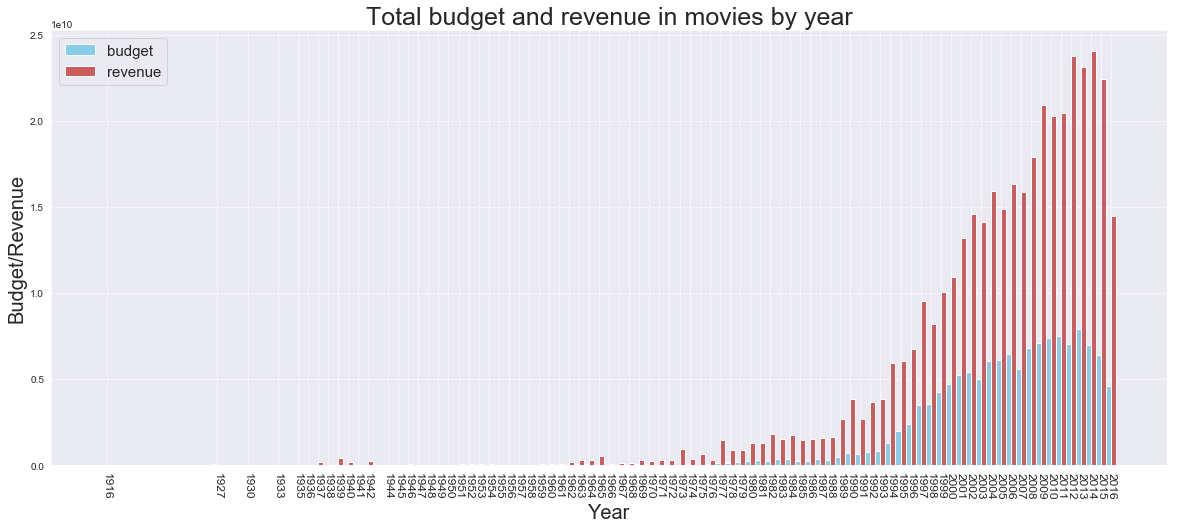

In [39]:
budget = df.groupby('release_year')['budget'].sum()
revenue = df.groupby('release_year')['revenue'].sum()

ind = df.groupby('release_year')['budget'].count().index
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize = (20,8))
rects1 = ax.bar(ind - width/2, budget, width, 
                color='SkyBlue', label='budget')
rects2 = ax.bar(ind + width/2, revenue, width, 
                color='IndianRed', label='revenue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Budget/Revenue', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)
ax.set_title('Total budget and revenue in movies by year',fontsize = 25 )
ax.set_xticks(ind)
plt.legend(fontsize = 15)
plt.xticks(rotation = 270, fontsize = 12)
plt.grid(ls='--')
plt.show()

观察上图可知，上世纪九十年代，对电影的投资和利润呈爆发式增长，在2014年达到巅峰。

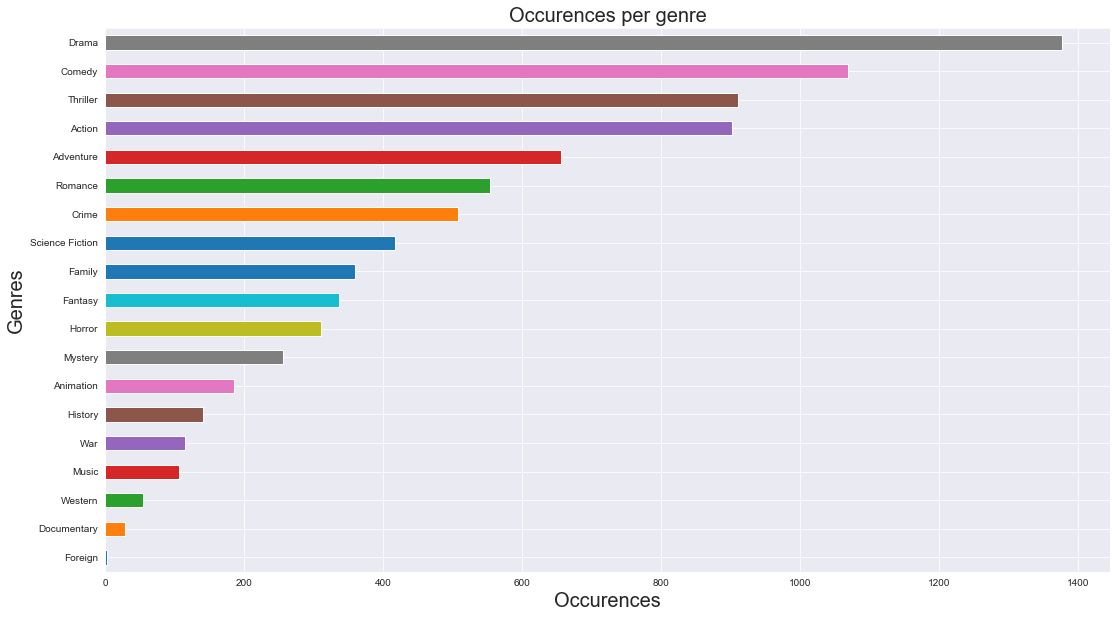

In [40]:
df_gysum.plot.barh(label='genre',figsize=(18,10))
plt.title('Occurences per genre',fontsize=20)
plt.xlabel('Occurences',fontsize=20)
plt.ylabel('Genres',fontsize=20)
plt.show()

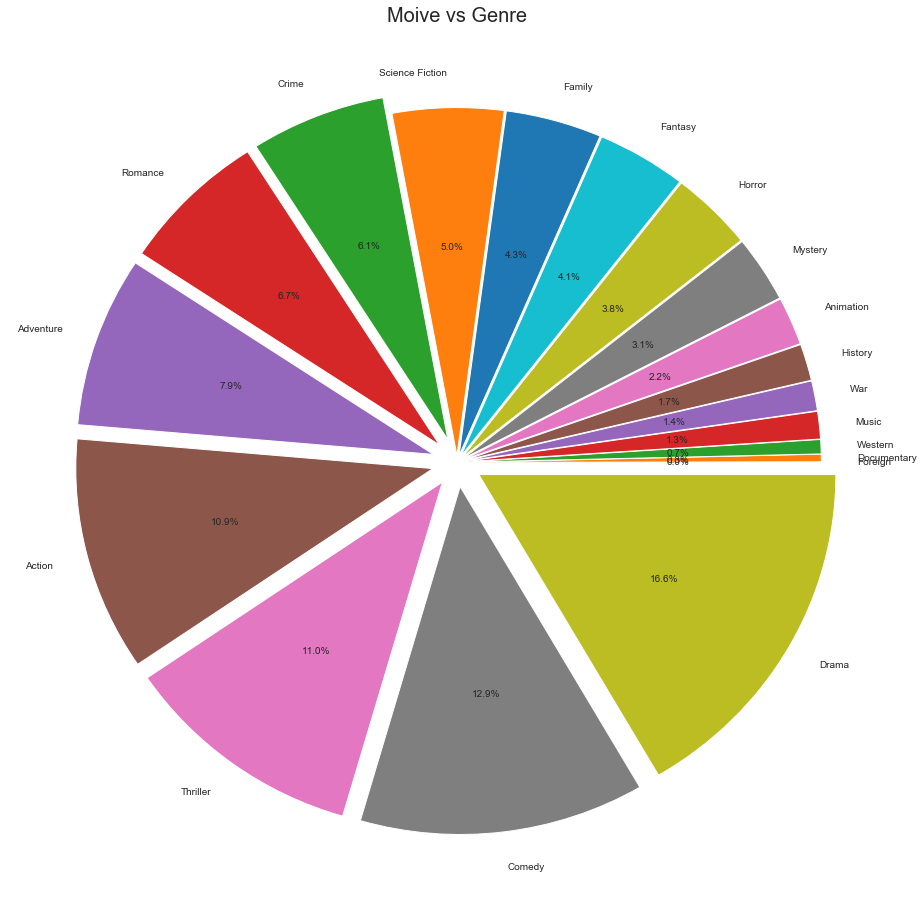

In [41]:
bl=df_gysum/df_gysum.sum()
#所占比例大于等于0.06时，往外高出一点
explode =(bl>=0.06)/20+0.02
#设置饼图参数
df_gysum.plot.pie(autopct='%1.1f%%',figsize=(16,16),label='',explode=explode)
plt.title('Moive vs Genre',fontsize=20)
plt.show()

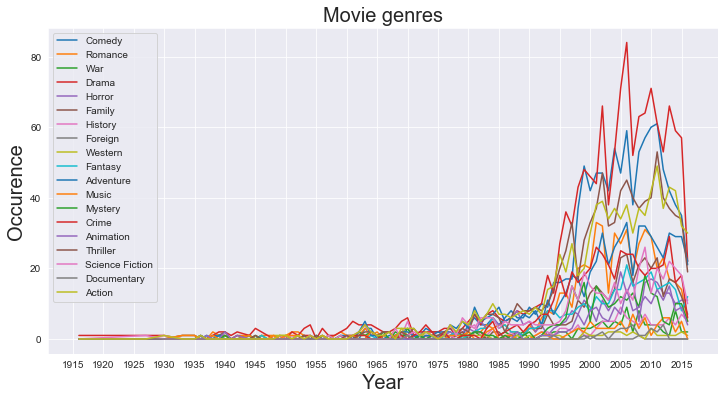

In [42]:
plt.figure(figsize=(12, 6))#画布大小
plt.plot(df_gys,label=df_gys.columns)#多个折线
plt.legend(df_gys)
plt.xticks(range(1915,2018,5))#刻度间隔
plt.title('Movie genres',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Occurence',fontsize=20)
plt.show()

观察发现，Drama和Comedy类型的电影数量最多，其中Drama、Comedy、Thriller、Action这四个类型占了一半多比例，分别为16.6%，12.9%，11.0%，10.9%。
自上个世纪九十年代，Drama，Comedy，Thriller，Action，Romance类电影增长规模最大。
为什么这些种类的电影数量最多？是因为它们利润更高？还是更受观众欢迎？

1.可视化各类电影的平均利润

In [43]:
list1=[] 

for g in genre: 
    list1.append(df.groupby(g)['profit'].mean()[1])
    
df_profit = pd.DataFrame(index = genre)
df_profit['average_profit'] = list1

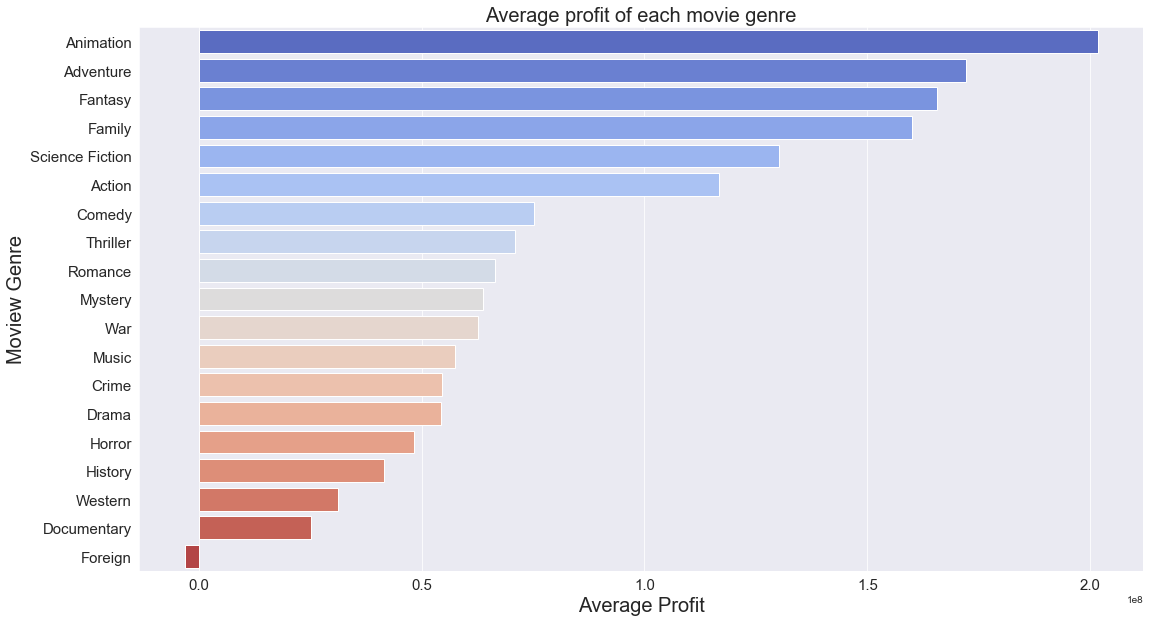

In [44]:
sorted_profit = df_profit.sort_values(by = 'average_profit', ascending = False)
f,ax = plt.subplots(figsize = (18,10))
sns.barplot(data = sorted_profit, x = 'average_profit', y = sorted_profit.index, palette="coolwarm")
plt.title('Average profit of each movie genre', fontsize = 20)
plt.xlabel('Average Profit', fontsize = 20)
plt.ylabel('Moview Genre', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

市场上利润最高的电影种类前六名是Animation,Adventure,Fantasy, Family, Science Fiction，Action。这些电影类型的市场占有率小于6%。商场出现最多的Drama、Comedy、Thriller、Action类型中Action的平均利润远远领先余下三类。

2.可视化各类电影的平均制作预算

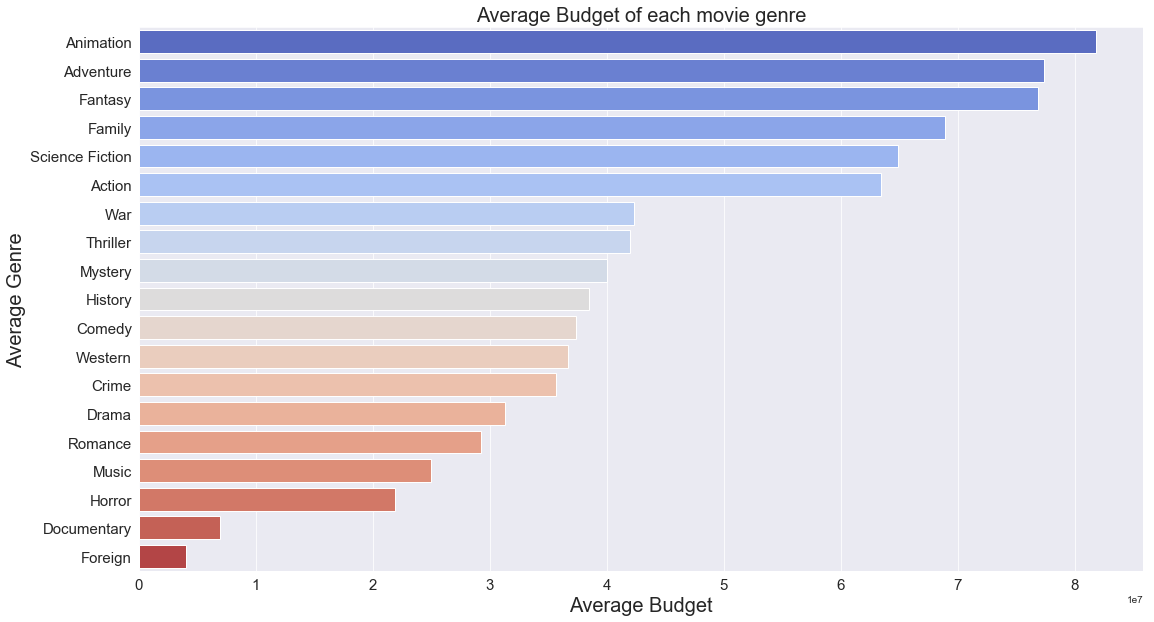

In [45]:
list2=[] 

for g in genre: 
    list2.append(df.groupby(g)['budget'].mean()[1])
    
df_budget = pd.DataFrame(index = genre)
df_budget['average_budget'] = list2

sorted_budget = df_budget.sort_values(by = 'average_budget', ascending = False)
f,ax = plt.subplots(figsize = (18,10))
sns.barplot(data = sorted_budget, x = 'average_budget', y = sorted_budget.index, palette="coolwarm")
plt.title('Average Budget of each movie genre', fontsize = 20)
plt.xlabel('Average Budget', fontsize = 20)
plt.ylabel('Average Genre', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

市场上制作预算最高的电影种类前六名是Animation,Adventure,Fantasy, Family, Science Fiction，Action。与利润最高的前六种类型一致。

3.可视化各类电影的投资回报比。

In [46]:
#df.loc[df[df["Comedy"] == 1]["ROI"].idxmax()]

In [47]:
df['ROI'] = (df['revenue'] - df['budget'])/df['budget']

list4=[] 

for g in genre: 
    list4.append(df.groupby(g)['ROI'].mean()[1])
    
df_ROI = pd.DataFrame(index = genre)
df_ROI['average_ROI'] = list4
sorted_ROI = df_ROI.sort_values(by = 'average_ROI', ascending = False)
sorted_ROI

,average_ROI
Documentary,7.029399
Horror,5.680378
Animation,5.163415
Family,4.205644
Music,4.163103
Adventure,3.450355
Romance,3.297758
War,3.277684
Thriller,3.191280
Drama,3.187603


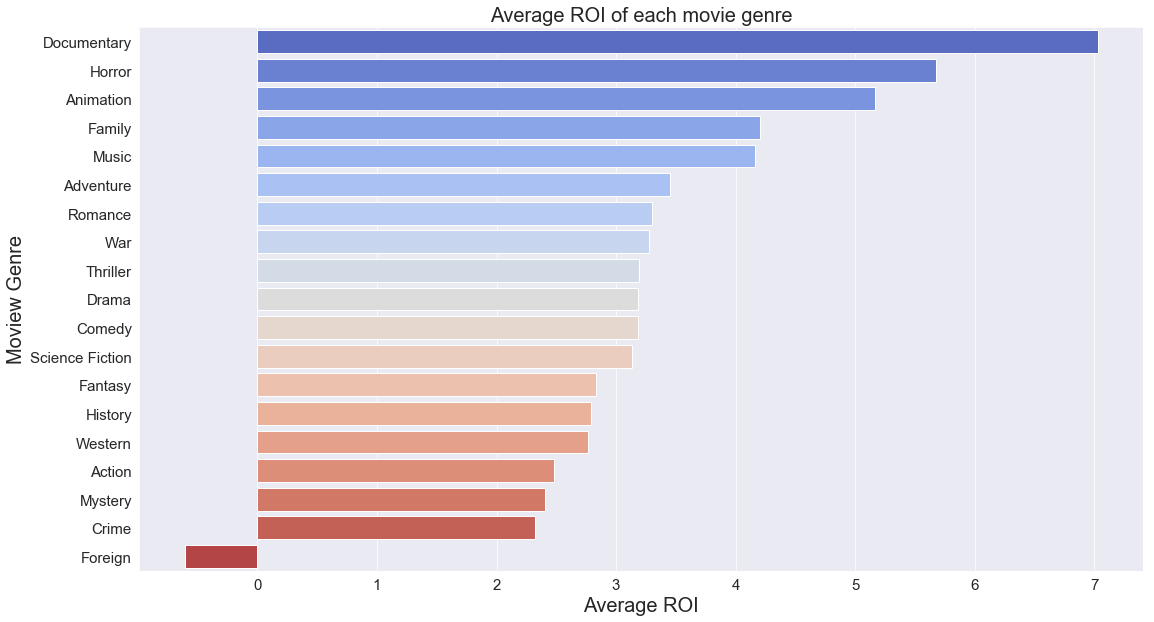

In [48]:
f,ax = plt.subplots(figsize = (18,10))
sns.barplot(data = sorted_ROI, x = 'average_ROI', y = sorted_ROI.index, palette="coolwarm")
plt.title('Average ROI of each movie genre', fontsize = 20)
plt.xlabel('Average ROI', fontsize = 20)
plt.ylabel('Moview Genre', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

Documentary、Horror、Animation投资回报率远远超过其它电影种类。其中Documentary和Horror类型的电影成本远小于其他种类。

3.可视化各类电影的平均受欢迎程度

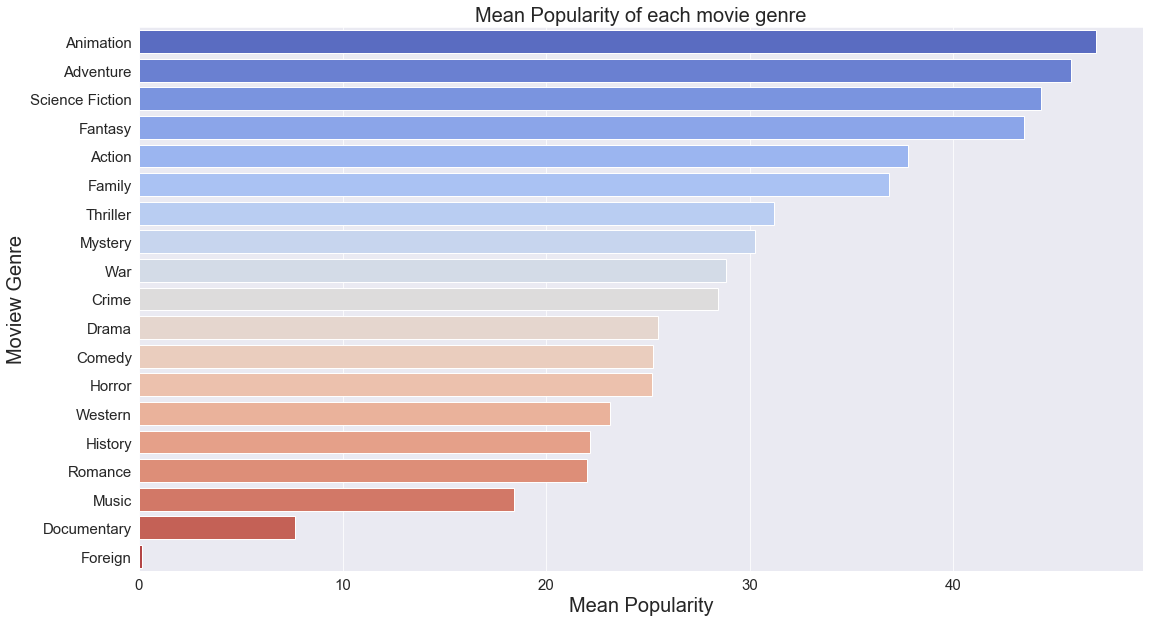

In [49]:
list3=[] 

for g in genre: 
    list3.append(df.groupby(g)['popularity'].mean()[1])
    
df_popular = pd.DataFrame(index = genre)
df_popular['average_popularity'] = list3


sorted_popularity = df_popular.sort_values(by = 'average_popularity', ascending = False)
f,ax = plt.subplots(figsize = (18,10))
sns.barplot(data = sorted_popularity, x = 'average_popularity', y = sorted_popularity.index, palette="coolwarm")
plt.title('Mean Popularity of each movie genre', fontsize = 20)
plt.xlabel('Mean Popularity', fontsize = 20)
plt.ylabel('Moview Genre', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

最受欢的电影类型排行前六的是：Animation，Adventure，Science Fiction，Fantacy，Action和Family。这六类电影也是市场上平均利润最高的。

4.电影票房与利润的关系

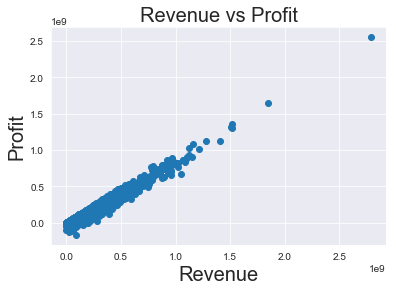

In [50]:
plt.scatter(x=df.revenue,y=df.profit)
plt.xlabel('Revenue',fontsize=20)
plt.ylabel('Profit',fontsize=20)
plt.title('Revenue vs Profit',fontsize=20)
plt.show()

利润和票房是正相关性的，票房越高利润越高.

5.电影预算与票房的关系

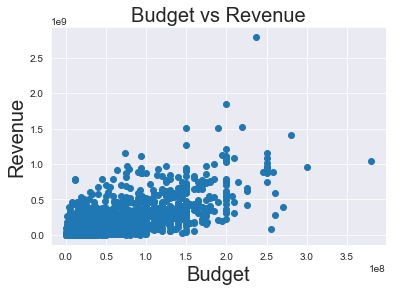

In [51]:
plt.scatter(x=df.budget,y=df.revenue)
plt.xlabel('Budget',fontsize=20)
plt.ylabel('Revenue',fontsize=20)
plt.title('Budget vs Revenue',fontsize=20)
plt.show()

除去一些极值,票房和预算是正相关性的，预算越高票房也越高.

6.电影票房与时长的关系

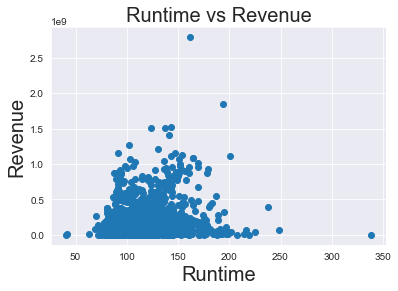

In [52]:
plt.scatter(x=df.duration,y=df.revenue)
plt.xlabel('Runtime',fontsize=20)
plt.ylabel('Revenue',fontsize=20)
plt.title('Runtime vs Revenue',fontsize=20)
plt.show()

电影的票房与时长之间的相关性不是特别明显，电影过长或者过短会对票房产生负面影响。（75mins到180mins是正常范围。）

7.电影票房与受欢迎程度的关系

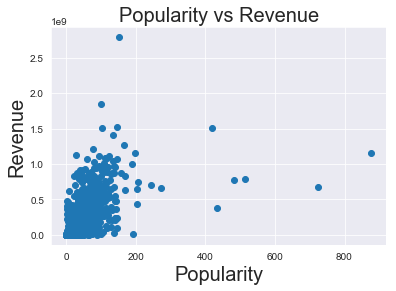

In [53]:
plt.scatter(x=df.popularity,y=df.revenue)
plt.xlabel('Popularity',fontsize=20)
plt.ylabel('Revenue',fontsize=20)
plt.title('Popularity vs Revenue',fontsize=20)
plt.show()

票房和受欢迎程度没有明显的相关性。

8.电影票房与评分的关系。如果电影评分人数很少，则评分受极值影响较大。因此对数据集进行处理，选取评分人数的排行前40%的进行观察。

In [54]:
m= df['vote_count'].quantile(0.6)
df_vote40 = df.copy().loc[df['vote_count'] >= m]

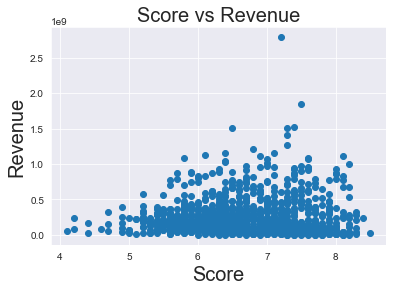

In [55]:
plt.scatter(x=df_vote40.score,y=df_vote40.revenue)
plt.xlabel('Score',fontsize=20)
plt.ylabel('Revenue',fontsize=20)
plt.title('Score vs Revenue',fontsize=20)
plt.show()

电影的票房和评分没有明显的相关性。

9.电影评分与受欢迎程度的关系。
如果电影评分人数很少，则评分受极值影响较大。因此对数据集进行处理，选取评分人数的排行前40%的进行观察。

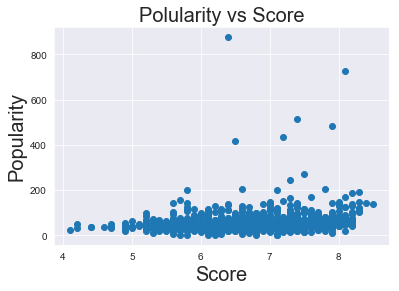

In [56]:
plt.scatter(y = df_vote40.popularity,x = df_vote40.score)
plt.ylabel('Popularity',fontsize = 20)
plt.xlabel('Score',fontsize = 20)
plt.title('Polularity vs Score',fontsize = 20)
plt.show()

电影受欢迎程度和评分没有明显的相关性。

10.电影受欢迎程度与时长的关系

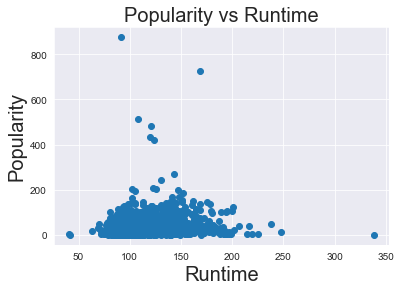

In [57]:
plt.scatter(y = df.popularity,x = df.duration)
plt.ylabel('Popularity',fontsize = 20)
plt.xlabel('Runtime',fontsize = 20)
plt.title('Popularity vs Runtime',fontsize = 20)
plt.show()

电影的受欢迎程度与时长之间的相关性不是特别明显，电影过长或者过短会对欢迎程度产生负面影响。（75mins到180mins是正常范围。）

10.对电影的导演进行分析

In [58]:
direct=df['director'].value_counts()

拍摄作品最多的前20名导演

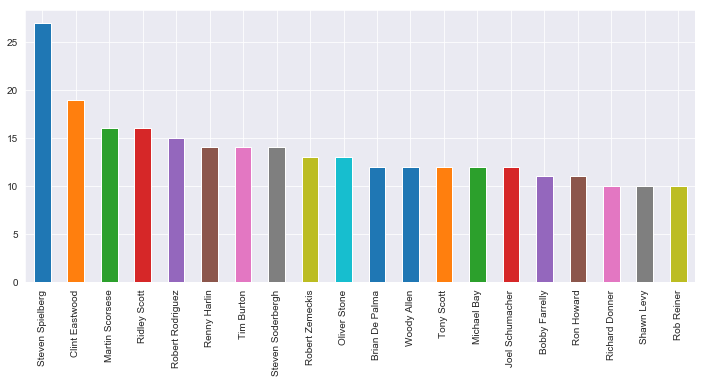

In [59]:
direct1 = direct[:20].sort_values(ascending = False)
direct1.plot.bar(figsize=(12,5))
plt.show()

作品均分排名前20的导演，均分十分接近。

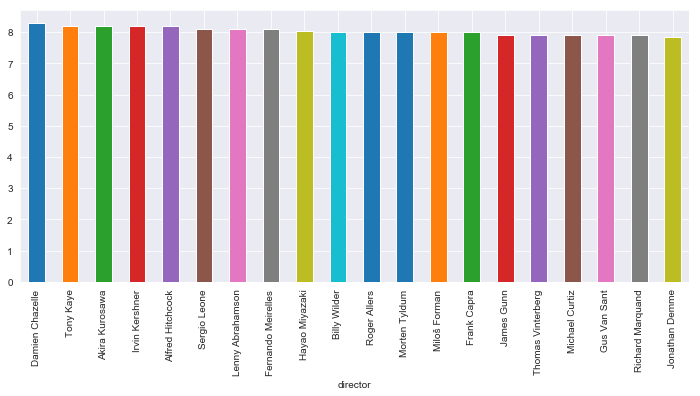

In [60]:
direct2=df_vote40.groupby('director')['score'].mean().sort_values(ascending=False)[:20]
direct2.plot.bar(figsize=(12,5))
plt.show()

平均票房排名前20名的导演

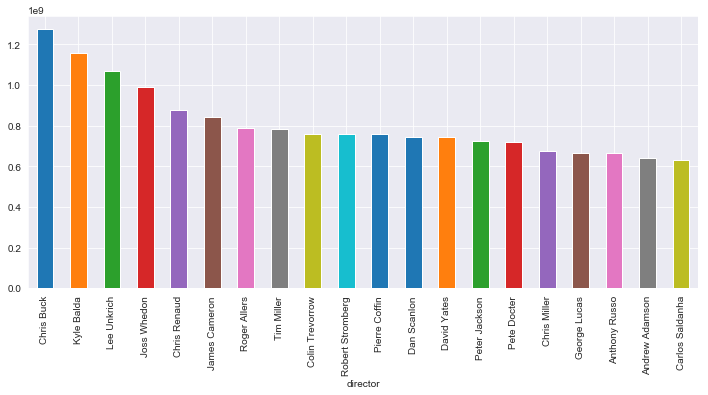

In [61]:
direct3 = df.groupby('director')['revenue'].mean().sort_values(ascending = False)[:20]
direct3.plot.bar(figsize=(12,5))
plt.show()

11.关键字分析

In [62]:
keywords_list = []
for i in df['keywords']:
    keywords_list.append(i)
    #keywords_list
# 把字符串列表连接成一个长字符串
lis = ''.join(keywords_list)
# 使用空格替换中间多余的字符串'\'s'
lis.replace('\'s','')
lis

"culture clash,future,space war,space colony,society,space travel,futuristic,romance,space,alien,tribe,alien planet,cgi,marine,soldier,battle,love affair,anti war,power relations,mind and soul,3docean,drug abuse,exotic island,east india trading company,love of one's life,traitor,shipwreck,strong woman,ship,alliance,calypso,afterlife,fighter,pirate,swashbuckler,aftercreditsstingerspy,based on novel,secret agent,sequel,mi6,british secret service,united kingdomdc comics,crime fighter,terrorist,secret identity,burglar,hostage drama,time bomb,gotham city,vigilante,cover-up,superhero,villainess,tragic hero,terrorism,destruction,catwoman,cat burglar,imax,flood,criminal underworld,batmanbased on novel,mars,medallion,space travel,princess,alien,steampunk,martian,escape,edgar rice burroughs,alien race,superhuman strength,mars civilization,sword and planet,19th century,3ddual identity,amnesia,sandstorm,love of one's life,forgiveness,spider,wretch,death of a friend,egomania,sand,narcism,hostility,

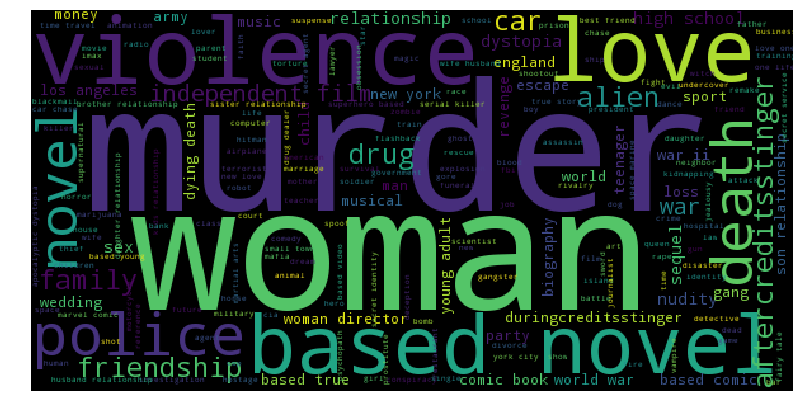

In [63]:
#制作词云图
from wordcloud import WordCloud
wc=WordCloud(background_color='black',#背景颜色
             max_words=3000,          #显示最大词数
             scale=1.5).generate(lis) #https://blog.csdn.net/u010309756/article/details/67637930
plt.figure(figsize=(14,7))
plt.imshow(wc)     #显示图片
plt.axis('off')
plt.show()